<a href="https://colab.research.google.com/github/mkirby1995/DS-Unit-2-Sprint-2-Regression/blob/master/module1-ols-regression/Linear-Regression-Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 20-80 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [0]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
from pylab import rcParams
rcParams['figure.figsize'] = 19, 10

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
df['date'] = df['date'].str.strip('T000000')

In [4]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64



---



##Pick an X

In [0]:
target = df['price']

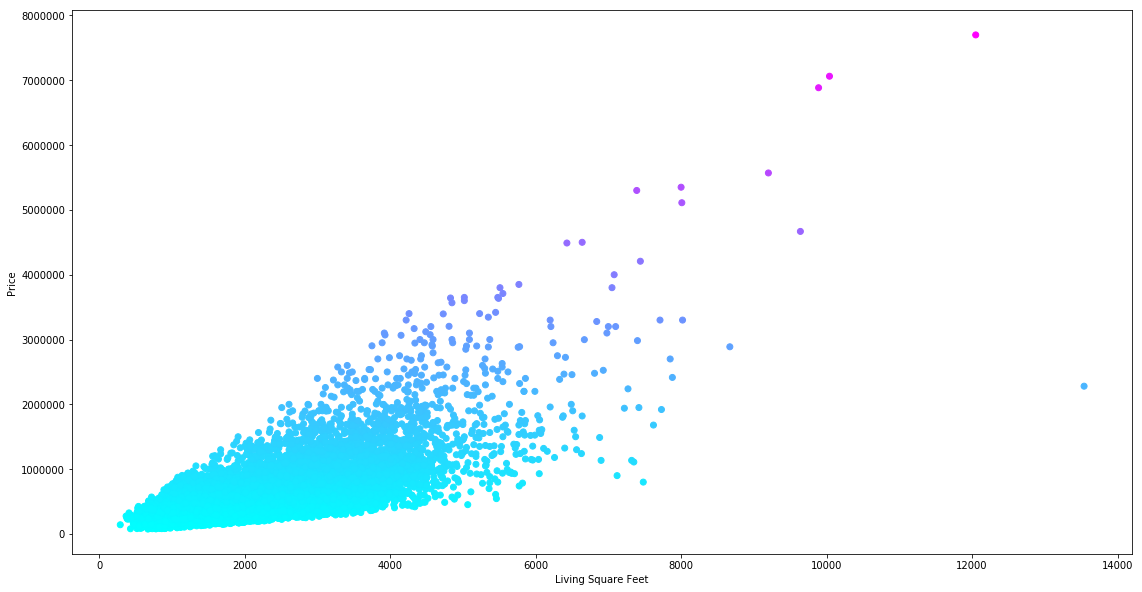

In [6]:
plt.scatter(df['sqft_living'], df['price'], c=df['price'], cmap='cool')
plt.ylabel('Price')
plt.xlabel('Living Square Feet')

plt.show();

In [0]:
feature = np.array(df['sqft_living']).reshape(-1, 1)



---



##Split Dataset

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(feature, target, test_size = .2)

In [9]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((17290, 1), (4323, 1), (17290,), (4323,))



---



##Train Model

In [0]:
linreg = LinearRegression()

In [11]:
linreg.fit(feature, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
beta_0 = linreg.intercept_
beta_i = linreg.coef_

print("Slope Coefficients: ", beta_i)
print("\nIntercept Value: ", beta_0)

Slope Coefficients:  [280.6235679]

Intercept Value:  -43580.74309447396


In [0]:
df['Bivariate_Prediction'] = linreg.predict(feature)



---



##Plot Results

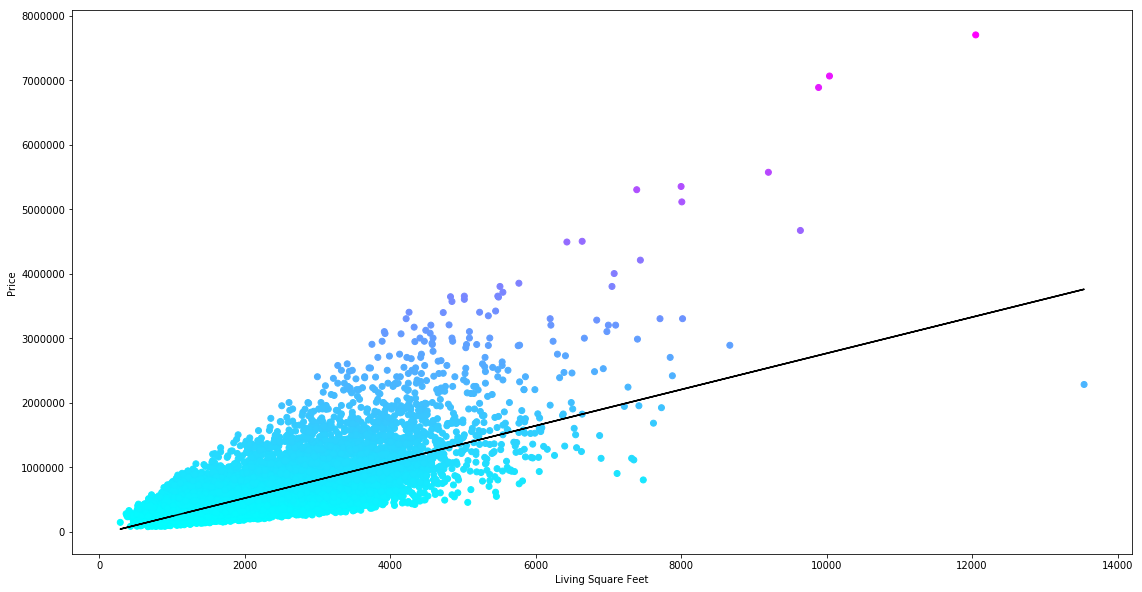

In [14]:
plt.scatter(df['sqft_living'], df['price'], c=df['price'], cmap='cool')
plt.plot(df['sqft_living'], df['Bivariate_Prediction'], c='black')
plt.ylabel('Price')
plt.xlabel('Living Square Feet')

plt.show();



---



##Error and $r^2$

In [15]:
print('Root Mean Squared Error\n', np.sqrt(mean_squared_error(target, linreg.predict(feature))))

Root Mean Squared Error
 261440.79030067177


In [16]:
print('R-Squared Value\n', linreg.score(feature, target))

R-Squared Value
 0.49285321790379316




---



# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 80-20 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

##Pick Two Xs'

In [0]:
target = df['price']

In [0]:
features = df[['sqft_living','yr_built']]

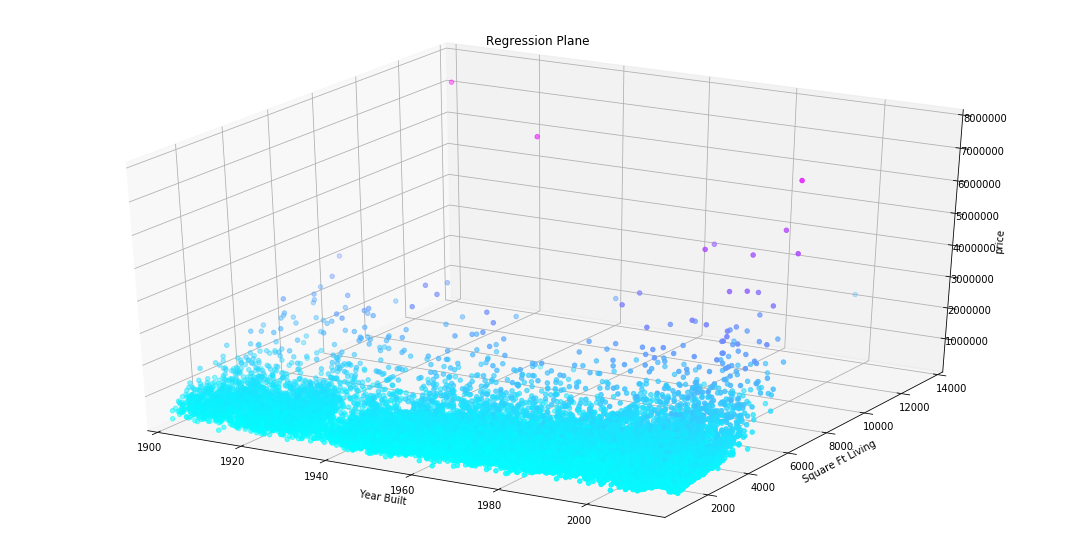

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot Points on 3D plot
ax.scatter(df['yr_built'], df['sqft_living'], df['price'], c=df['price'], cmap='cool')

plt.title("Regression Plane")

ax.set_zlabel('price');
plt.xlabel('Year Built')
plt.ylabel('Square Ft Living')

ax.set_xlim(1900,2015)
ax.set_ylim(200,14000)
ax.set_zlim(75000,8000000)

plt.show();



---



##Split Dataset

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size = .2)

In [21]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((17290, 2), (4323, 2), (17290,), (4323,))



---



##Train Model

In [22]:
linreg.fit(features, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
beta_0 = linreg.intercept_
beta_i = linreg.coef_

print("Slope Coefficients: ", beta_i)
print("\nIntercept Value: ", beta_0)

Slope Coefficients:  [  304.56520719 -2353.73193233]

Intercept Value:  4545840.774565984


In [0]:
df['Two_Variable_Prediction'] = linreg.predict(features)



---



##Plot Results

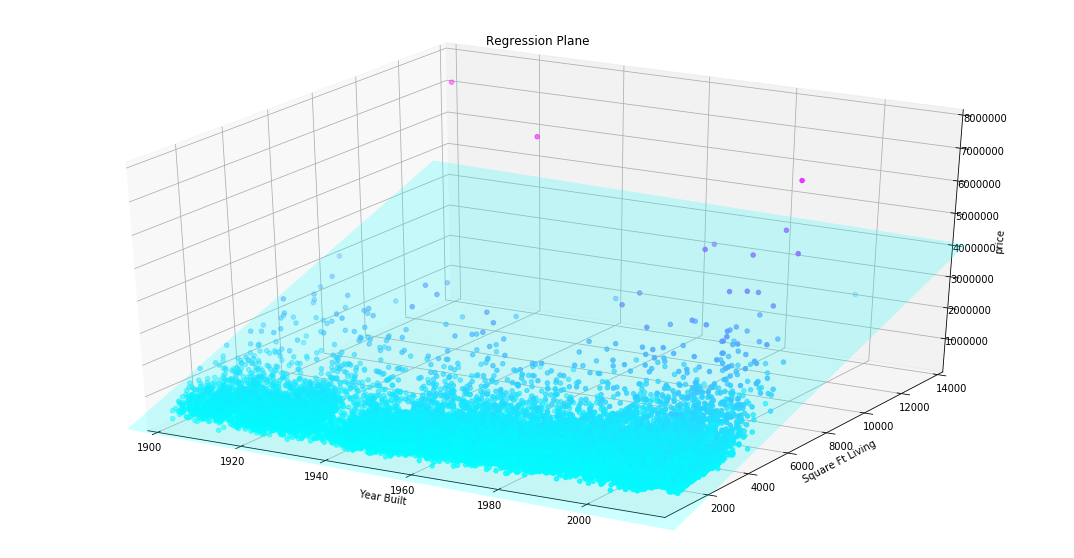

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot Points on 3D plot
ax.scatter(df['yr_built'], df['sqft_living'], df['price'], c=df['price'], cmap='cool')

# Set axes to size of scatter data
x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1,y1)
zz = beta_i[1]*xx + beta_i[0]*yy + beta_0

# Plot Plane
plt3d = plt.gca(projection='3d')

# Add Opacity to Plane 
plt3d.plot_surface(xx, yy, zz, alpha=0.2, cmap='cool')

plt.title("Regression Plane")

ax.set_zlabel('price');
plt.xlabel('Year Built')
plt.ylabel('Square Ft Living')

ax.set_xlim(1900,2015)
ax.set_ylim(200,14000)
ax.set_zlim(75000,8000000)

plt.show();

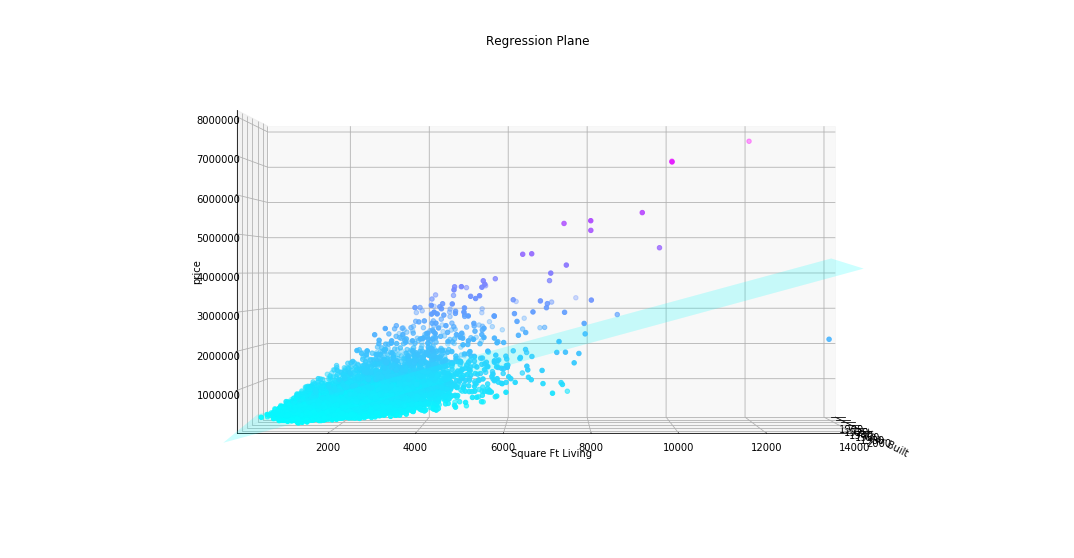

In [26]:
ax.view_init(0, 0)
fig

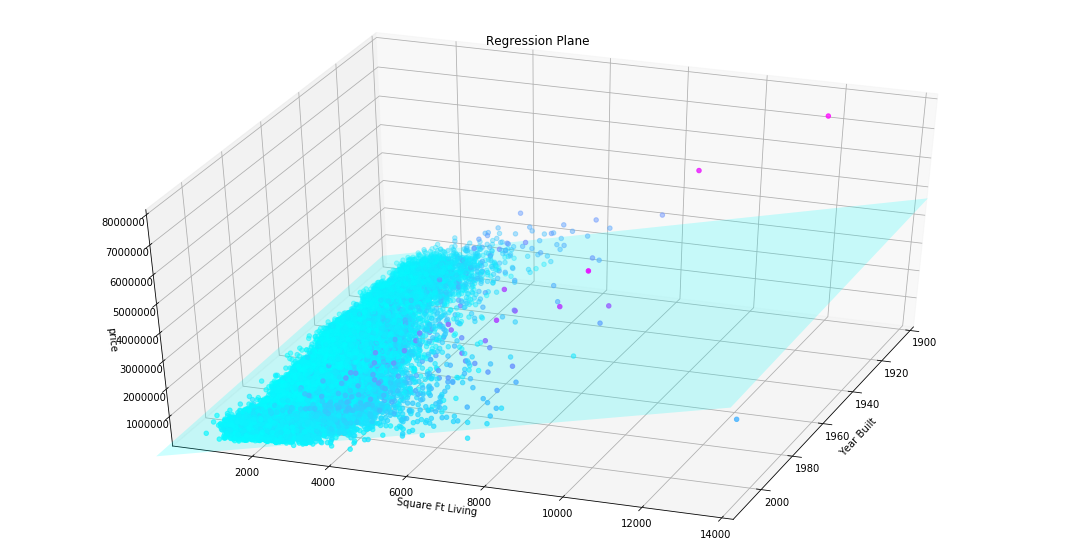

In [27]:
ax.view_init(40,20)
fig



---



##Error and $r^2$

In [28]:
print('Root Mean Squared Error\n', np.sqrt(mean_squared_error(target, linreg.predict(features))))

Root Mean Squared Error
 253091.00628330302


In [29]:
print('R-Squared Value\n', linreg.score(features, target))

R-Squared Value
 0.5247299974331727




---



# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

##Select Features

In [0]:
target = df['price']

In [0]:
features = df.drop(columns='price')



---



##Split Dataset

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size = .2)

In [33]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((17290, 22), (4323, 22), (17290,), (4323,))



---



##Train Model

In [34]:
linreg.fit(features, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
beta_0 = linreg.intercept_
beta_i = linreg.coef_

print("Slope Coefficients: ", beta_i)
print("\nIntercept Value: ", beta_0)

Slope Coefficients:  [-1.29565778e-06 -3.50871835e-04 -3.57713839e+04  4.11945601e+04
 -2.21061003e-03  1.21453736e-01  6.76819089e+03  5.82632716e+05
  5.30100339e+04  2.62888358e+04  9.60231951e+04  1.55227830e+01
 -1.55249919e+01 -7.59386122e-04  1.95837109e+01 -5.81739569e+02
  6.02370381e+05 -2.12628284e+05  2.16636658e+01 -3.96245926e-01
 -6.19861227e-01  1.11461386e+00]

Intercept Value:  1823148.2657555672


In [0]:
df['Multiple_Prediction'] = linreg.predict(features)



---



##Error and $r^2$

In [37]:
print('Root Mean Squared Error\n', np.sqrt(mean_squared_error(target, linreg.predict(features))))

Root Mean Squared Error
 201121.75517818797


In [38]:
print('R-Squared Value\n', linreg.score(features, target))

R-Squared Value
 0.6998729913321411




---



# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- AMES Housing Prediction Kaggle Competition: <https://www.kaggle.com/c/house-prices-advanced-regression-techniques>
- **WRITE A BLOG POST** explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
